,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu abnormal
count,12435.000000,12435.000000,12435.000000,1.243500e+04,12435.000000,12434.000000,588.000000
mean,6217.000000,9717.682831,17.757082,7.249797e+06,13.599920,4.028631,188.149134
std,3589.819633,562.947985,39.042422,1.637850e+04,2.986224,3.265631,32.112686
min,0.000000,5144.000000,3.026276,7.227697e+06,7.000000,0.000000,50.102957
25%,3108.500000,9643.000000,5.638478,7.235081e+06,12.000000,2.000000,181.153177
50%,6217.000000,9838.000000,7.857559,7.244535e+06,14.000000,3.000000,188.652785
75%,9325.500000,10000.000000,11.540039,7.267689e+06,16.000000,5.000000,201.735663
max,12434.000000,11000.000000,306.273464,7.277789e+06,20.000000,15.000000,306.273464


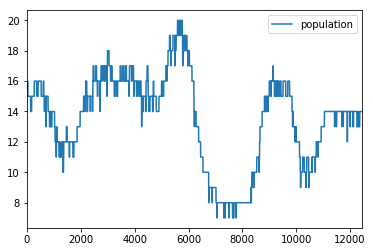

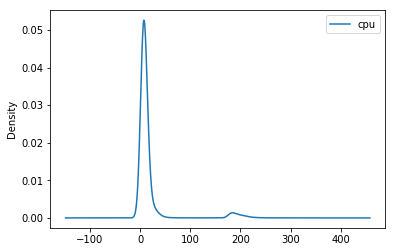

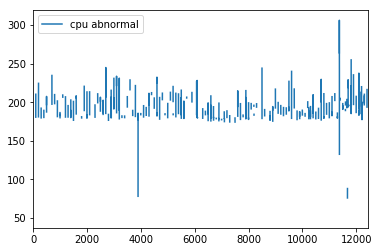

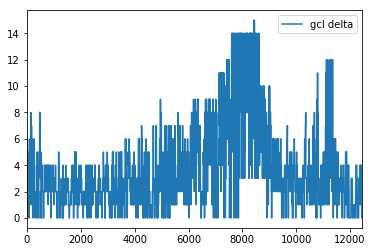

In [13]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]

df.plot(y="population")
df.plot.density(y="cpu")
df.plot(y="cpu abnormal")
df.plot(y="gcl delta")
df.describe()